In [1]:
# General imports / setup
from util import *
%matplotlib inline
from sklearn import cross_validation
from os import path

/Users/simon/anaconda/envs/py35/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Import models
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Load training data
working_directory = '/Volumes/HD-LBU2/kaggle/mnist/'
x, y = get_train_data(path=path.join(working_directory,'train.csv'))

Reading in data from /Volumes/HD-LBU2/kaggle/mnist/train.csv
Done reading.


In [4]:
# Show example data
# print(y[0])
# show_figure(x[0])

In [5]:
# Create model
model = RandomForestClassifier()

In [6]:
# Get cross-validation scores
scores = cross_validation.cross_val_score(model, x, y, cv=5)
print ("Average score (1.0 means perfect): {}".format(scores.mean()))

Average score (1.0 means perfect): 0.9373337366454886


In [7]:
# Train the model on the full train set.
final_model = model.fit(x, y)

In [8]:
# Load test data
test = get_test_data(path=path.join(working_directory,'test.csv'))

Reading in data from /Volumes/HD-LBU2/kaggle/mnist/test.csv
Done reading.


In [9]:
# Make the predictions on the test set
predictions = final_model.predict(test)

# Sanity check 1 - print how many predicitons were made
n_predictions = predictions.shape[0]
print ("Made {} predictions.".format(n_predictions))

Made 28000 predictions.


Prediction: 7


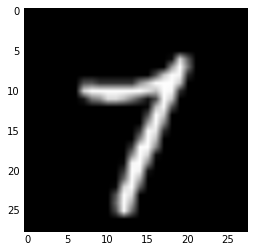

Prediction: 1


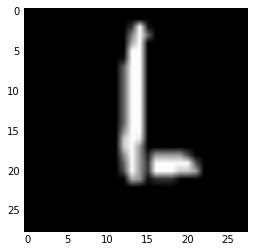

Prediction: 5


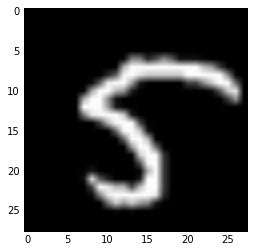

Prediction: 4


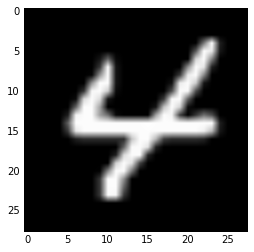

Prediction: 6


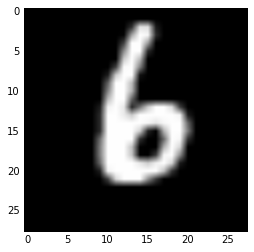

In [10]:
# Sanity check 2 - eyeball-check a few predictions
for _ in range(5):
    sample_index = np.random.randint(n_predictions)
    print ("Prediction: {}".format(predictions[sample_index]))
    show_figure(test[sample_index])

In [13]:
# Write out the predictions in the submission format
prefix = 'x' # set this to something memorable
write_predictions(predictions, path=path.join(working_directory, 'submission_{}.csv'.format(prefix)))